# Neural network classification 

In [4]:
## create some data

import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim

In [63]:

nSamples = 1000

x, y = make_circles(nSamples, noise=0.03, random_state=12)
len(x), len(y)

(1000, 1000)

In [68]:
x[:5]

array([[ 0.76285419,  0.21290457],
       [-0.01353444, -0.7827793 ],
       [-0.67886261, -0.42597787],
       [-1.00609936, -0.32508754],
       [-0.58527996, -0.79164499]])

In [4]:
# Make dataframe of circle data

import pandas as pd 

In [5]:
circles = pd.DataFrame({"x1": x[:, 0], 
                        "x2": x[:,1], 
                        "label" : y})
circles.head(10)

,x1,x2,label
0,0.762854,0.212905,1
1,-0.013534,-0.782779,1
2,-0.678863,-0.425978,1
3,-1.006099,-0.325088,0
4,-0.585280,-0.791645,0
5,-0.476239,-0.619021,1
6,-0.794808,-0.185560,1
7,-0.420094,-0.633928,1
8,0.538023,-0.558993,1
9,-0.092983,-1.060052,0


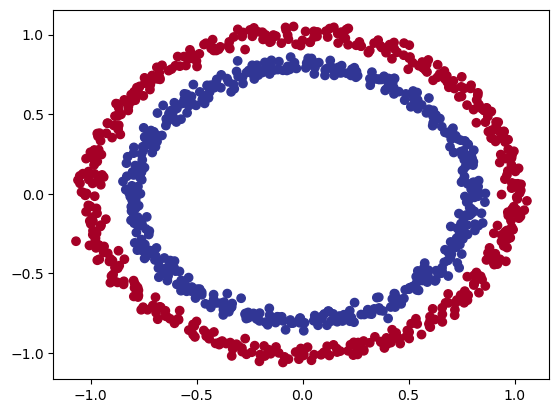

In [64]:
# visualize

plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## make data into tensors



In [65]:
x.shape, y.shape

((1000, 2), (1000,))

In [67]:
xTensor = torch.tensor(x).type(torch.float)
yTensor = torch.tensor(y).type(torch.float)
xTensor[:5]

tensor([[ 0.7629,  0.2129],
        [-0.0135, -0.7828],
        [-0.6789, -0.4260],
        [-1.0061, -0.3251],
        [-0.5853, -0.7916]])

In [69]:
# split the data into training and test

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xTensor, yTensor, 
                                                test_size=0.2)
xTrain.shape, xTest.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

## Build the model


In [13]:
dev = "cuda" if torch.cuda.is_available() else "cpu"



In [16]:
class circleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1) # output layer

    def forward(self, x):
        return self.layer2(self.layer1())

In [18]:
circleM = circleModel()
circleM.to(dev)

circleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [49]:
## simpler way to build the model

circleMV2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=50), 
    nn.Linear(in_features=50, out_features=1)
).to(dev)

#circleMV2.state_dict()

## Loss and optimizer


In [53]:
lossFn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(circleMV2.parameters(), lr=0.01)

In [32]:
# accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc 

In [36]:
## activation function is needed to make outputs of model compatible with labels

yPredLogit = circleMV2(xTest)

## use sigmoid function

yPredProb = torch.round(torch.sigmoid(yPredLogit))
yPredProb[:25]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)

In [54]:
# optimize

epochs = range(1000 )


for e in epochs:
    # training

    circleMV2.train()

    # forward pass

    yLogits = circleMV2(xTrain).squeeze()
    yPred = torch.round(torch.sigmoid(yLogits))

    # calculate accuracy
    loss = lossFn(yLogits, 
                  yTrain) # takes logits, not predictions
    acc = accuracy_fn(yTrain, yPred)


    # optimizer
    optimizer.zero_grad()

    # backwards
    loss.backward()

    optimizer.step()

    #testing

    circleMV2.eval()

    with torch.inference_mode():
        testPreds = torch.round(torch.sigmoid(circleMV2(xTest).squeeze()))
        testLoss = lossFn(circleMV2(xTest).squeeze(), yTest)

        testAccuracy = accuracy_fn(yTest, testPreds)

    if e % 10 == 0:
        print(f"Epoch: {e}, Loss: {loss}, Acc: {acc}, Test Loss: {testLoss}, Test Acc: {testAccuracy}")        

Epoch: 0, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 10, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 20, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 30, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 40, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 50, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 60, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 70, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 80, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 90, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0.6951184868812561, Test Acc: 46.0
Epoch: 100, Loss: 0.6929337978363037, Acc: 51.0, Test Loss: 0

In [39]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [42]:
# investigate by visualizing model. 

from helpers import plot_decision_boundary, plot_predictions



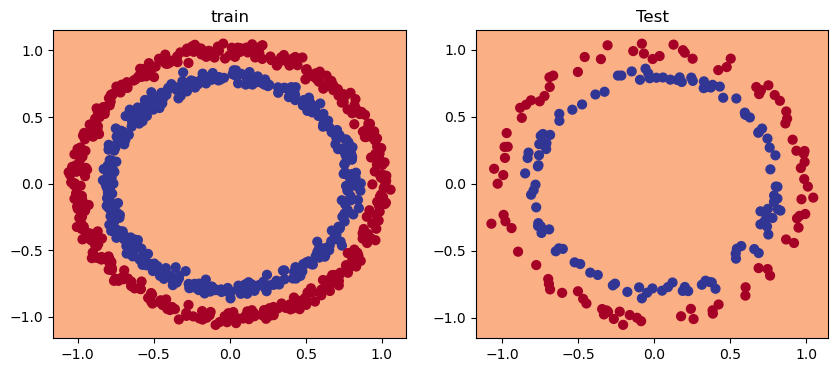

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circleMV2, xTrain, yTrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(circleMV2, xTest, yTest)

In [56]:
# try again and experiment with the model

class circleModelV3(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10) 
        self.layer3 = nn.Linear(in_features=10, out_features=1) 

    def forward(self, x):
        return self.layer3(self.layer2(self.layer1(x)))
    
circleV3 = circleModelV3()

In [57]:
# optimize

lossFn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(circleV3.parameters(), lr=0.01)

epochs = range(1000)


for e in epochs:
    # training

    circleV3.train()

    # forward pass

    yLogits = circleV3(xTrain).squeeze()
    yPred = torch.round(torch.sigmoid(yLogits))

    # calculate accuracy
    loss = lossFn(yLogits, 
                  yTrain) # takes logits, not predictions
    acc = accuracy_fn(yTrain, yPred)


    # optimizer
    optimizer.zero_grad()

    # backwards
    loss.backward()

    optimizer.step()

    #testing

    circleMV2.eval()

    with torch.inference_mode():
        testPreds = torch.round(torch.sigmoid(circleV3(xTest).squeeze()))
        testLoss = lossFn(circleV3(xTest).squeeze(), yTest)

        testAccuracy = accuracy_fn(yTest, testPreds)

    if e % 10 == 0:
        print(f"Epoch: {e}, Loss: {loss}, Acc: {acc}, Test Loss: {testLoss}, Test Acc: {testAccuracy}")  

Epoch: 0, Loss: 0.7096369862556458, Acc: 51.0, Test Loss: 0.7282674312591553, Test Acc: 46.0
Epoch: 10, Loss: 0.7073296904563904, Acc: 51.0, Test Loss: 0.7246904969215393, Test Acc: 46.0
Epoch: 20, Loss: 0.7053569555282593, Acc: 51.0, Test Loss: 0.7215467691421509, Test Acc: 46.0
Epoch: 30, Loss: 0.7036677002906799, Acc: 51.0, Test Loss: 0.718776524066925, Test Acc: 46.0
Epoch: 40, Loss: 0.7022190690040588, Acc: 51.0, Test Loss: 0.7163293361663818, Test Acc: 46.0
Epoch: 50, Loss: 0.7009757161140442, Acc: 51.0, Test Loss: 0.7141626477241516, Test Acc: 46.0
Epoch: 60, Loss: 0.6999072432518005, Acc: 51.0, Test Loss: 0.7122401595115662, Test Acc: 46.0
Epoch: 70, Loss: 0.6989884376525879, Acc: 51.0, Test Loss: 0.710530698299408, Test Acc: 46.0
Epoch: 80, Loss: 0.6981974840164185, Acc: 51.0, Test Loss: 0.709007978439331, Test Acc: 46.0
Epoch: 90, Loss: 0.6975163221359253, Acc: 51.0, Test Loss: 0.7076488733291626, Test Acc: 46.0
Epoch: 100, Loss: 0.6969291567802429, Acc: 51.0, Test Loss: 0.70

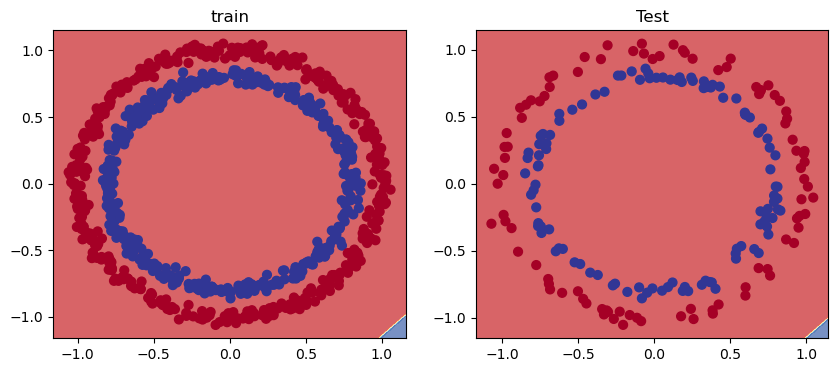

In [58]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circleV3, xTrain, yTrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(circleV3, xTest, yTest)

## Add non-linearity to the model

In [74]:
class circleModelV4(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10) 
        self.layer3 = nn.Linear(in_features=10, out_features=1) 
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [75]:
circleV4 = circleModelV4()
print(circleV4)

circleModelV4(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [78]:
# optimize again

# optimize

lossFn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(circleV4.parameters(), lr=0.1)

epochs = range(1001)


for e in epochs:
    # training

    circleV4.train()

    # forward pass

    yLogits = circleV4(xTrain).squeeze()
    yPred = torch.round(torch.sigmoid(yLogits))

    # calculate accuracy
    loss = lossFn(yLogits, 
                  yTrain) # takes logits, not predictions
    acc = accuracy_fn(yTrain, yPred)


    # optimizer
    optimizer.zero_grad()

    # backwards
    loss.backward()

    optimizer.step()

    #testing

    circleV4.eval()

    with torch.inference_mode():
        testLogits = circleV4(xTest).squeeze()
        testPreds = torch.round(torch.sigmoid(testLogits))
        testLoss = lossFn(testLogits, yTest)

        testAccuracy = accuracy_fn(yTest, testPreds)

    if e % 100 == 0:
        print(f"Epoch: {e}, Loss: {loss}, Acc: {acc}, Test Loss: {testLoss}, Test Acc: {testAccuracy}") 

Epoch: 0, Loss: 0.5366866588592529, Acc: 91.25, Test Loss: 0.5423747897148132, Test Acc: 87.5
Epoch: 100, Loss: 0.4322279989719391, Acc: 94.625, Test Loss: 0.4379000961780548, Test Acc: 93.5
Epoch: 200, Loss: 0.29920756816864014, Acc: 98.75, Test Loss: 0.3072657883167267, Test Acc: 97.5
Epoch: 300, Loss: 0.18535654246807098, Acc: 99.875, Test Loss: 0.19678662717342377, Test Acc: 100.0
Epoch: 400, Loss: 0.11517991125583649, Acc: 100.0, Test Loss: 0.1284458488225937, Test Acc: 100.0
Epoch: 500, Loss: 0.0777687281370163, Acc: 100.0, Test Loss: 0.08983340114355087, Test Acc: 100.0
Epoch: 600, Loss: 0.056491050869226456, Acc: 100.0, Test Loss: 0.06749454140663147, Test Acc: 100.0
Epoch: 700, Loss: 0.043362122029066086, Acc: 100.0, Test Loss: 0.05329795181751251, Test Acc: 100.0
Epoch: 800, Loss: 0.034716326743364334, Acc: 100.0, Test Loss: 0.04373219981789589, Test Acc: 100.0
Epoch: 900, Loss: 0.028681602329015732, Acc: 100.0, Test Loss: 0.036866191774606705, Test Acc: 100.0
Epoch: 1000, Lo

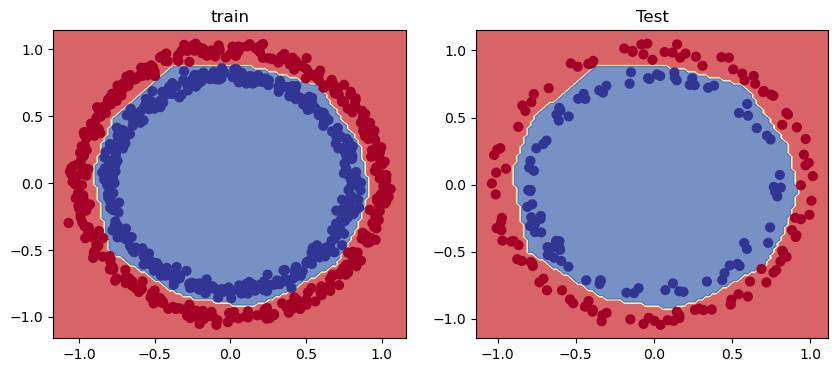

In [79]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circleV4, xTrain, yTrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(circleV4, xTest, yTest)

In [2]:
from sklearn.datasets import make_moons 

x,y = make_moons(n_samples=1000, noise=0.1)

x.shape

(1000, 2)

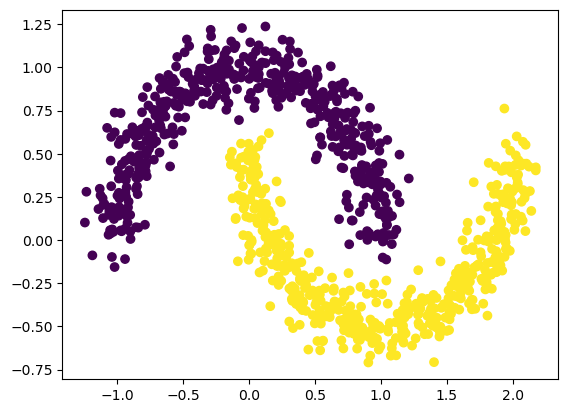

In [6]:
plt.scatter(x[:,0], x[:,1], c=y)

In [9]:
x, y = torch.tensor(x), torch.tensor(y)
x.shape, y.shape

C:\Users\jmhimara\AppData\Local\Temp\ipykernel_18680\1452365621.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


(torch.Size([1000, 2]), torch.Size([1000]))